In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
mnist = tf.keras.datasets.mnist

(28, 28)

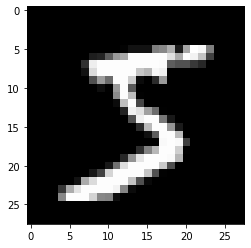

In [14]:
#split the mnist-data into train and test
#x_train,x_test contain the images while y_train, y_test contain the digits
(X_train, y_train),(X_test, y_test) = mnist.load_data()

#display one image of the mnist data
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
X_train[0].shape

In [0]:
#reshape the data to fit the model

X_train = X_train.reshape(60000,28,28,1)
X_test =  X_test.reshape(10000,28,28,1)

#encode the data (X_train, X_test)
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
#build a Sequential model, filters used and theirs kernel_size
#more filters provide more output channels(image-depth)
#the output of a convolution called 'feature-map'
# max-pooling picks the maximum value in a certain size of the window like window_size is (2,2) to reduce the width and the height of the image. or average-pooling that averges the values not the maximum.
#the general successful structure used is: (2-convolution layes with acivations follwed by pooling layers, flatten layers ,and dense layer with activation)
#flatten converts the 2D-matrix into 1D vector
#Dropout is a regualization used to exclude some neurons of the layer to avoid overfitting

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64,  kernel_size=3, activation= 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(filters=32,  kernel_size=3, activation= 'relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')                         
]) 

In [0]:
#compile the model takes three parameters:(optimizer, loss and metrics), using accuracy to model performace.
#the optimizer controls the learning rate, the adam optmizer adjusts the learning-rate throughout training.

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
#train the model(.fit_the training data(X_train) and the target(y_train)) and evaluate it 

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=5)
model.evaluate(X_test, y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 187s 3ms/sample - loss: 0.0052 - acc: 0.9983 - val_loss: 0.0773 - val_acc: 0.9860
Epoch 2/5
60000/60000 [==============================] - 187s 3ms/sample - loss: 0.0037 - acc: 0.9987 - val_loss: 0.0738 - val_acc: 0.9885
Epoch 3/5
60000/60000 [==============================] - 186s 3ms/sample - loss: 0.0049 - acc: 0.9984 - val_loss: 0.0757 - val_acc: 0.9877
Epoch 4/5
60000/60000 [==============================] - 186s 3ms/sample - loss: 0.0049 - acc: 0.9982 - val_loss: 0.0855 - val_acc: 0.9878
Epoch 5/5
10000/10000 [==============================] - 6s 611us/sample - loss: 0.0856 - acc: 0.9860


[0.08555271262374133, 0.986]

In [28]:
#predict first 4-images in the test-set
model.predict(X_test[:4])

array([[2.5023075e-23, 4.7099399e-30, 1.6457765e-20, 7.3695212e-15,
        1.7524753e-27, 3.1160583e-25, 1.2184306e-37, 1.0000000e+00,
        8.1213756e-19, 4.9852588e-19],
       [2.6807710e-20, 1.5150221e-19, 1.0000000e+00, 1.2198384e-24,
        2.3555327e-28, 9.4798823e-31, 3.6922775e-16, 8.0747185e-37,
        5.8079113e-21, 1.7715364e-28],
       [6.4733117e-14, 1.0000000e+00, 6.2702579e-11, 5.0545891e-15,
        8.3874365e-09, 8.0760870e-11, 1.0777557e-11, 1.8413000e-11,
        4.1852820e-11, 1.0814966e-16],
       [1.0000000e+00, 5.0510121e-27, 7.5865920e-15, 5.3691987e-24,
        2.1586013e-27, 4.8813390e-21, 9.7725103e-19, 6.0575894e-22,
        1.5390591e-23, 7.0891655e-17]], dtype=float32)

In [29]:
#actual results for the first 4-images in test-set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

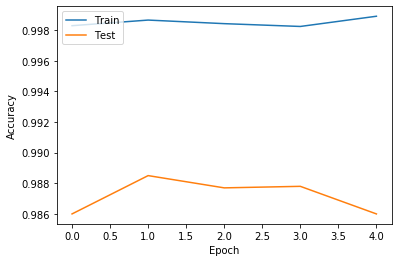

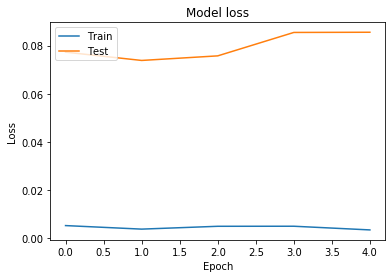

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()